<a href="https://colab.research.google.com/github/aakarshbalpande/Security-risk-assessment-tool/blob/main/Security_risk_assessment_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

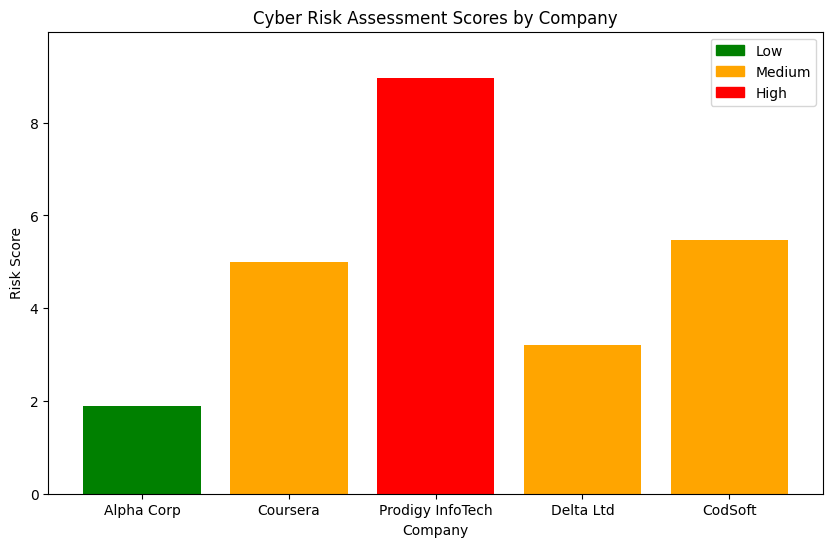

,Company,Num Employees,"Has Security Training (Yes=1,No=0)",IT Infrastructure Complexity (1-5),Number of Past Incidents,Data Sensitivity Level (1-5),Risk Score,Risk_category
0,Alpha Corp,50,1,2,0,1,1.90,Low
1,Coursera,100,1,4,3,2,5.00,Medium
2,Prodigy InfoTech,80,0,3,4,4,8.96,High
3,Delta Ltd,200,1,3,1,1,3.20,Medium
4,CodSoft,40,0,1,0,3,5.48,Medium


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython import get_ipython
from IPython.display import display
import matplotlib.patches as mpatches
#Data sample
data = {
       'Company': ['Alpha Corp', 'Coursera', 'Prodigy InfoTech', 'Delta Ltd', 'CodSoft'],
       'Num Employees': [50, 100, 80, 200, 40],
       'Has Security Training (Yes=1,No=0)': [1, 1, 0, 1, 0],
       'IT Infrastructure Complexity (1-5)': [2, 4, 3, 3, 1],
       'Number of Past Incidents': [0, 3, 4, 1, 0],
       'Data Sensitivity Level (1-5)': [1, 2, 4, 1, 3]
   }


def calculate_Risk_score(row):
       score = 0
       score += (row['Num Employees'] / 1000) * 2
       score += (1 - row['Has Security Training (Yes=1,No=0)']) * 3
       score += (row['IT Infrastructure Complexity (1-5)'] / 5) * 3
       score += (row['Number of Past Incidents'] / 10) * 4
       score += (row['Data Sensitivity Level (1-5)'] / 5) * 3
       return round(score, 2)


def Risk_category(score):
    if score < 3:
        return 'Low'
    elif score < 6:
        return 'Medium'
    else:
        return 'High'

df = pd.DataFrame(data)

df['Risk Score'] = df.apply(calculate_Risk_score, axis=1)

df['Risk_category'] = df['Risk Score'].apply(Risk_category)

colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}
plt.figure(figsize=(10,6))

bars = plt.bar(df['Company'], df['Risk Score'], color=[colors[c] for c in df['Risk_category']])

plt.title('Cyber Risk Assessment Scores by Company')
plt.xlabel('Company')
plt.ylabel('Risk Score')

legend_handles = [mpatches.Patch(color=color, label=category) for category, color in colors.items()]
plt.legend(handles=legend_handles)
plt.ylim(0, max(df['Risk Score']) + 1)
plt.show()

display(df)



